## Horizontal Well Production Analysis

This notebook analyzes oil and gas production data from horizontal wells in West Virginia.  
The dataset originates from the West Virginia Department of Environmental Protection (WVDEP).

## Objectives


- Explore the dataset and clean missing values.
- Perform descriptive and exploratory analysis.
- Generate visualizations to highlight key insights.

## Import Libraries and Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
file_path ='https://dep.wv.gov/oil-and-gas/databaseinfo/Documents/Production%20Data/2024%20Q2%20WV%20Horizontal%20H6A%20Production%20Data%20File.xlsx'
data = pd.read_excel(file_path, sheet_name=0)

In [ ]:
data.head()

,Year,API,County,Reporting_RP,Operator,Well Type,Jan_Gas,Feb_Gas,Mar_Gas,Apr_Gas,...,Apr_NGL,May_NGL,Jun_NGL,Jul_NGL,Aug_NGL,Sep_NGL,Oct_NGL,Nov_NGL,Dec_NGL,Total_NGL
0,2024,4700103221,Barbour,DIVERSIFIED PRODUCTION LLC,DIVERSIFIED PRODUCTION LLC,HOR6A,21662.0,19897.0,21094.0,18621.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0.0
1,2024,4700103222,Barbour,DIVERSIFIED PRODUCTION LLC,DIVERSIFIED PRODUCTION LLC,HOR6A,22836.0,21112.0,22411.0,19509.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0.0
2,2024,4700103223,Barbour,DIVERSIFIED PRODUCTION LLC,DIVERSIFIED PRODUCTION LLC,HOR6A,16526.0,15027.0,16157.0,13735.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0.0
3,2024,4700103238,Barbour,DIVERSIFIED PRODUCTION LLC,DIVERSIFIED PRODUCTION LLC,HOR6A,25266.0,23316.0,24780.0,21347.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0.0
4,2024,4700103239,Barbour,DIVERSIFIED PRODUCTION LLC,DIVERSIFIED PRODUCTION LLC,HOR6A,24320.0,22642.0,24098.0,20905.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3217 entries, 0 to 3216
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          3217 non-null   int64  
 1   API           3217 non-null   int64  
 2   County        3217 non-null   object 
 3   Reporting_RP  3217 non-null   object 
 4   Operator      3217 non-null   object 
 5   Well Type     3217 non-null   object 
 6   Jan_Gas       3217 non-null   float64
 7   Feb_Gas       3217 non-null   float64
 8   Mar_Gas       3217 non-null   float64
 9   Apr_Gas       3217 non-null   float64
 10  May_Gas       3217 non-null   float64
 11  Jun_Gas       3217 non-null   float64
 12  Jul_Gas       3217 non-null   int64  
 13  Aug_Gas       3217 non-null   int64  
 14  Sep_Gas       3217 non-null   int64  
 15  Oct_Gas       3217 non-null   int64  
 16  Nov_Gas       3217 non-null   int64  
 17  Dec_Gas       3217 non-null   int64  
 18  Total_Gas     3217 non-null 

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,3217.0,2.024000e+03,0.000000e+00,2.024000e+03,2.024000e+03,2.024000e+03,2.024000e+03,2.024000e+03
API,3217.0,4.706148e+09,3.229545e+06,4.700103e+09,4.703306e+09,4.706102e+09,4.709502e+09,4.710304e+09
Jan_Gas,3217.0,7.877426e+04,1.116252e+05,0.000000e+00,2.067500e+04,3.766500e+04,8.265900e+04,7.166990e+05
Feb_Gas,3217.0,7.364466e+04,1.016110e+05,0.000000e+00,1.989700e+04,3.621700e+04,7.926700e+04,6.642300e+05
Mar_Gas,3217.0,7.703380e+04,1.063443e+05,0.000000e+00,2.100900e+04,3.815600e+04,8.135200e+04,7.555790e+05
Apr_Gas,3217.0,7.723520e+04,1.064730e+05,0.000000e+00,2.085600e+04,3.709400e+04,8.239600e+04,6.969850e+05
May_Gas,3217.0,7.888961e+04,1.095164e+05,0.000000e+00,2.171523e+04,3.798700e+04,8.457200e+04,8.213980e+05
Jun_Gas,3217.0,7.740410e+04,1.103854e+05,0.000000e+00,2.074100e+04,3.635100e+04,8.205954e+04,8.295930e+05
Jul_Gas,3217.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Aug_Gas,3217.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


## Handling Missing Values

In [ ]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Series([], dtype: int64)


In [ ]:
production_columns = data.columns[data.columns.str.contains('Gas|Oil|Water|NGL')]
data[production_columns] = data[production_columns].fillna(0)

## Exploratory Data Analysis (EDA)

# Calculate total production per well

In [ ]:
data['Total_Gas'] = data[[col for col in data.columns if 'Gas' in col]].sum(axis=1)
data['Total_Oil'] = data[[col for col in data.columns if 'Oil' in col]].sum(axis=1)
data['Total_Water'] = data[[col for col in data.columns if 'Water' in col]].sum(axis=1)

# Top wells by gas production

In [ ]:
top_gas_wells = data.sort_values(by='Total_Gas', ascending=False).head(10)
top_gas_wells[['API', 'County', 'Operator', 'Total_Gas']]

,API,County,Operator,Total_Gas
3125,4710303412,Wetzel,EQT PRODUCTION COMPANY,7658322.0
3145,4710303437,Wetzel,EQT PRODUCTION COMPANY,7381136.0
3151,4710303445,Wetzel,EQT PRODUCTION COMPANY,7268952.0
3149,4710303443,Wetzel,EQT PRODUCTION COMPANY,7264012.0
3150,4710303444,Wetzel,EQT PRODUCTION COMPANY,7208272.0
2795,4709502867,Tyler,ANTERO RESOURCES CORPORATION,6981266.0
3143,4710303435,Wetzel,EQT PRODUCTION COMPANY,6941104.0
3144,4710303436,Wetzel,EQT PRODUCTION COMPANY,6858444.0
3126,4710303413,Wetzel,EQT PRODUCTION COMPANY,6858114.0
3142,4710303434,Wetzel,EQT PRODUCTION COMPANY,6819422.0


# Visualize distribution of gas production

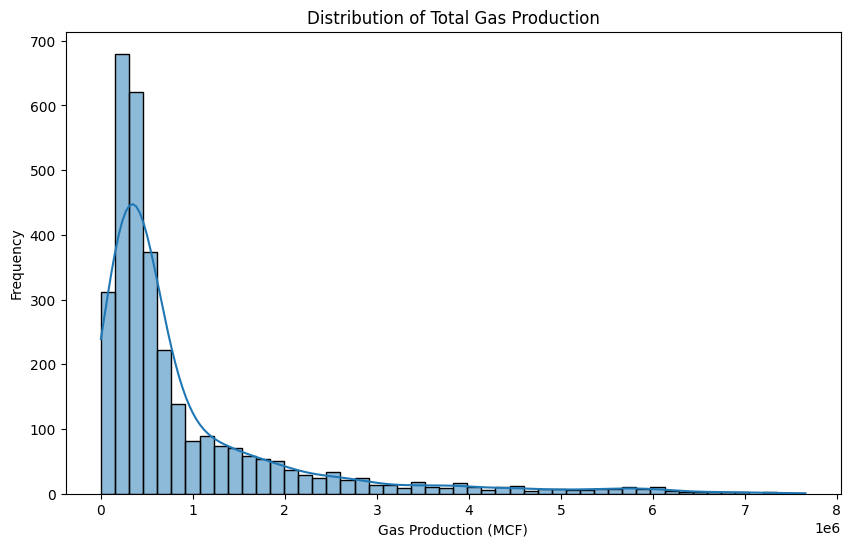

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Total_Gas'], bins=50, kde=True)
plt.title('Distribution of Total Gas Production')
plt.xlabel('Gas Production (MCF)')
plt.ylabel('Frequency')
plt.show()

# Total production by county

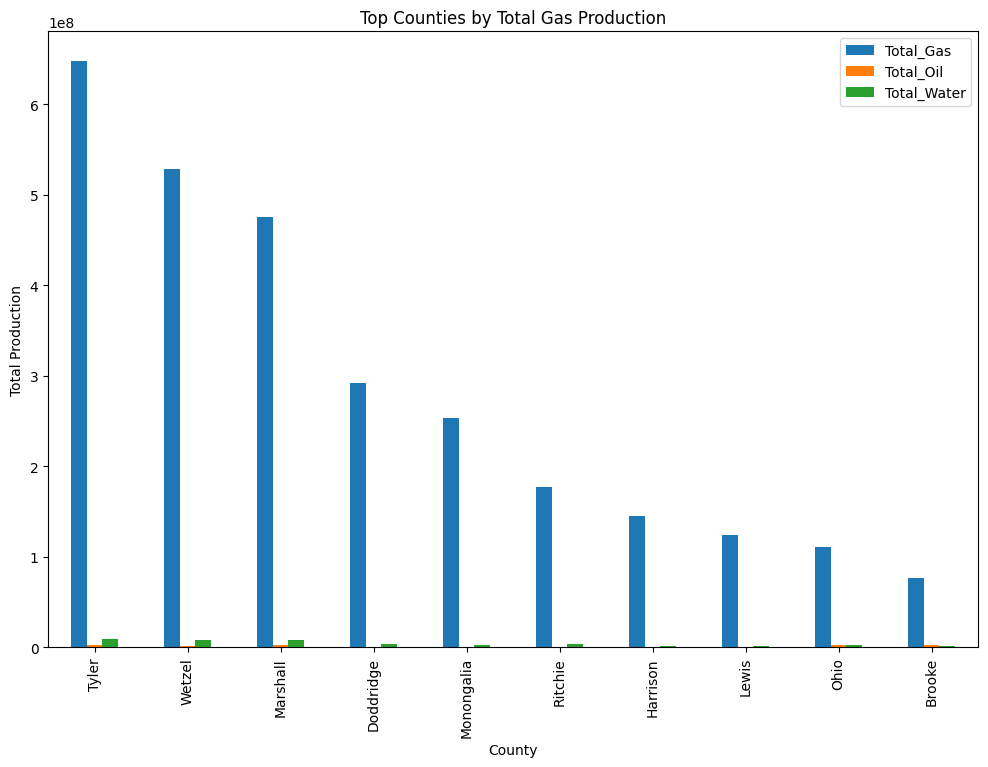

In [ ]:
county_production = data.groupby('County')[['Total_Gas', 'Total_Oil', 'Total_Water']].sum().sort_values(by='Total_Gas', ascending=False)
county_production.head(10).plot(kind='bar', figsize=(12, 8))
plt.title('Top Counties by Total Gas Production')
plt.ylabel('Total Production')
plt.xlabel('County')
plt.show()

# Top 10 wells by total gas production

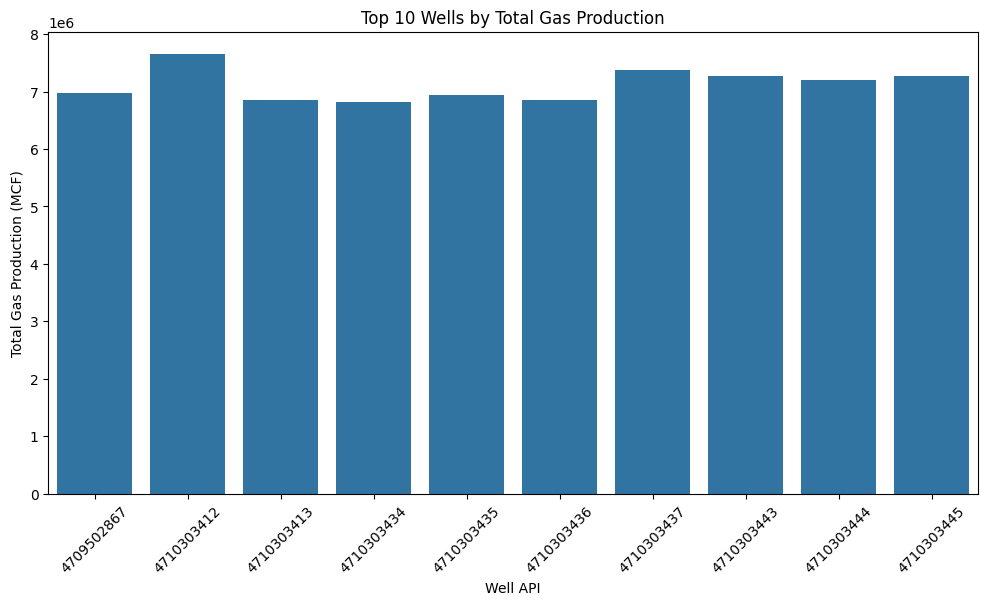

In [ ]:
top_wells = data.sort_values(by='Total_Gas', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='API', y='Total_Gas', data=top_wells)
plt.title('Top 10 Wells by Total Gas Production')
plt.xlabel('Well API')
plt.ylabel('Total Gas Production (MCF)')
plt.xticks(rotation=45)
plt.show()

Calculate Water-Oil Ratio (WOR) for each well


In [ ]:
data['Water_Oil_Ratio'] = data['Total_Water'] / data['Total_Oil']
data['Water_Oil_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
wor_data = data.dropna(subset=['Water_Oil_Ratio'])

<ipython-input-17-364291f45fd7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Water_Oil_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)


In [ ]:
top_inefficient_wells = wor_data.sort_values(by='Water_Oil_Ratio', ascending=False).head(10)

In [ ]:
top_inefficient_wells[['API', 'County', 'Operator', 'Water_Oil_Ratio']]

,API,County,Operator,Water_Oil_Ratio
2323,4709502214,Tyler,CNX GAS COMPANY LLC,2747.000000
2492,4709502491,Tyler,CNX GAS COMPANY LLC,2244.000000
2490,4709502489,Tyler,CNX GAS COMPANY LLC,1706.000000
1058,4705101635,Marshall,"LOAN ASSET ISSUER LLC, SERIES 2021 NG-1",1674.000000
1172,4705101792,Marshall,"LOAN ASSET ISSUER LLC, SERIES 2021 NG-1",1345.875000
3082,4710303251,Wetzel,"SWN PRODUCTION COMPANY, LLC",1340.124066
886,4704105685,Lewis,"HG ENERGY II APPALACHIA, LLC",1192.600000
2491,4709502490,Tyler,CNX GAS COMPANY LLC,926.000000
3187,4710303522,Wetzel,EQT PRODUCTION COMPANY,589.968750
3188,4710303523,Wetzel,EQT PRODUCTION COMPANY,583.906250


# Visualizing Inefficiency by County

In [ ]:
county_wor = top_inefficient_wells.groupby('County')['Water_Oil_Ratio'].mean().sort_values(ascending=False)


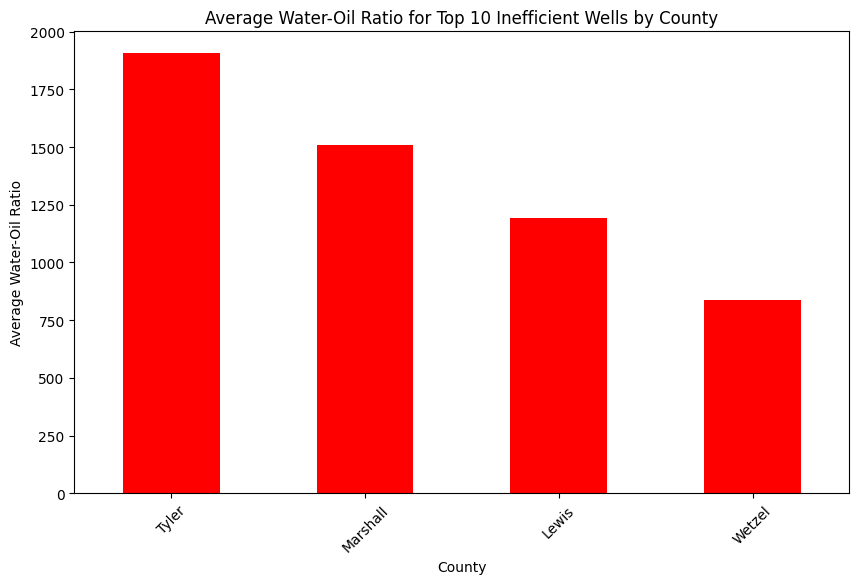

In [ ]:
plt.figure(figsize=(10, 6))
county_wor.plot(kind='bar', color='red')
plt.title('Average Water-Oil Ratio for Top 10 Inefficient Wells by County')
plt.xlabel('County')
plt.ylabel('Average Water-Oil Ratio')
plt.xticks(rotation=45)
plt.show()

## Insights and Recommendations



*   Wells 47100303412 and 4710303437 are the most productive ubicated in Wetzel county.

*   The Water-Oil Ratio (WOR) is calculated by dividing the total water production by the total oil production for each well. High values of WOR indicate potential inefficiency, as more water is produced relative to oil. Well 4709502214 in Tyler county is the most inefficient , it is necessary to explore operational improvements, because by the other side Tyler county have the greatest production overall.


*   Wetzel County shows potential for further exploration as the WOR is the lowest, also have the wells with more production.

